### Random Forest


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../Tree Based Methods/penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df=df.dropna()

In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [6]:
X=pd.get_dummies(df.drop("species",axis=1),drop_first=True)

In [7]:
y=df["species"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc=RandomForestClassifier(n_estimators=10,
                           max_features="auto",
                           random_state=101)

In [12]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [13]:
pred=rfc.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

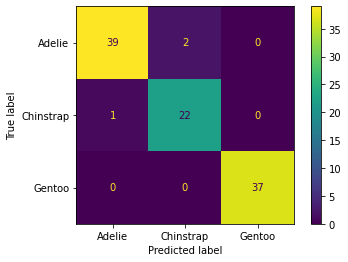

In [15]:
plot_confusion_matrix(rfc,X_test,y_test)

In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [17]:
rfc.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

In [18]:
df=pd.read_csv("./data_banknote_authentication.csv")

In [19]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


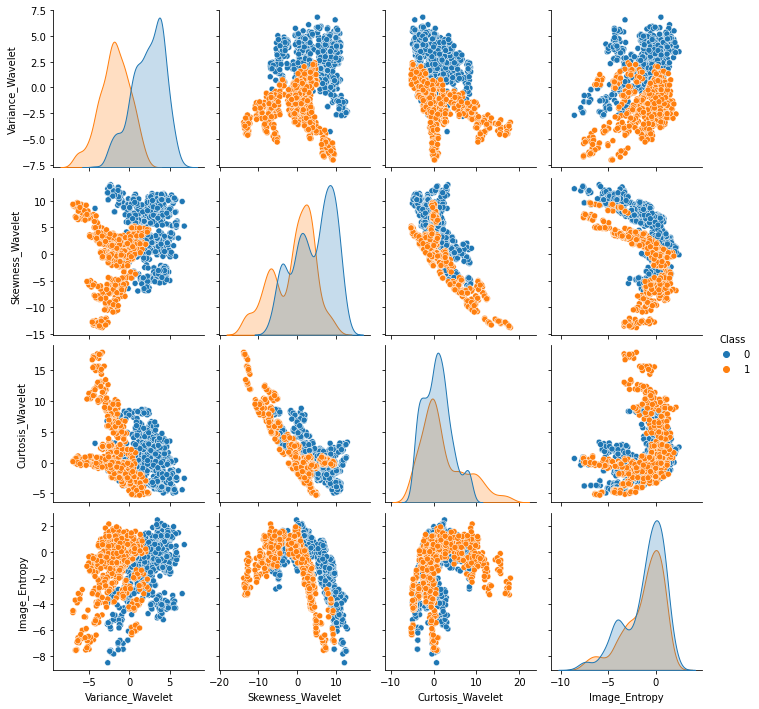

In [20]:
sns.pairplot(df,hue="Class")

In [21]:
X=df.drop("Class",axis=1)

In [22]:
y=df["Class"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)


In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
n_estimators=[64,100,128,200]

In [26]:
max_features=[2,3,4]

In [27]:
bootstrap=[True,False]

In [28]:
oob_score=[True,False]

In [29]:
param_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "bootstrap":bootstrap,
            "oob_score":oob_score}

In [30]:
rfc=RandomForestClassifier()

In [31]:
grid=GridSearchCV(rfc,param_grid)

In [32]:
grid.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/pyth

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [33]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': False}

In [34]:
rfc=RandomForestClassifier(max_features=2,n_estimators=200,oob_score=True)

In [35]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [36]:
rfc.oob_score_

0.9939965694682675

In [37]:
pred=rfc.predict(X_test)

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



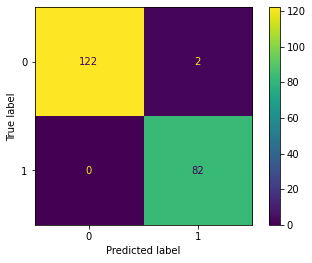

In [39]:
plot_confusion_matrix(rfc,X_test,y_test)

In [40]:
errors=[]
misclassifications=[]

for n in range(1,200):

    rfc=RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(X_train,y_train)
    pred=rfc.predict(X_test)
    err=1-accuracy_score(y_test,pred)
    n_missed=np.sum(pred!=y_test)

    errors.append(err)
    misclassifications.append(n_missed)

    

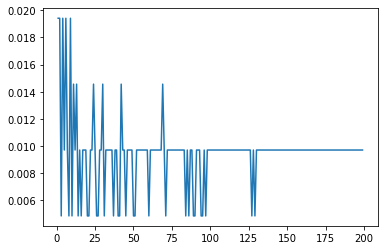

In [41]:
plt.plot(range(1,200),errors)

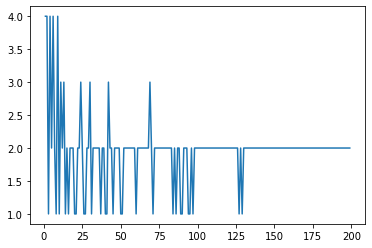

In [42]:
plt.plot(range(1,200),misclassifications)

### Random Forest Regression

In [43]:
df=pd.read_csv("./rock_density_xray.csv")

In [44]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [45]:
df.columns=["Signal","Density"]

<AxesSubplot:xlabel='Signal', ylabel='Density'>

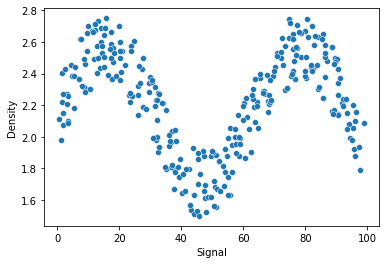

In [46]:
sns.scatterplot(x="Signal",y="Density",data=df)

In [53]:
X=df["Signal"].values.reshape(-1,1)
y=df["Density"]

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)


In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr_model=LinearRegression()

In [58]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [59]:
lr_pred=lr_model.predict(X_test)

In [60]:
lr_pred

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [62]:
mean_absolute_error(y_test,lr_pred)

0.211198973318633

In [63]:
np.sqrt(mean_squared_error(y_test,lr_pred))

0.2570051996584629

In [65]:
signal_range=np.arange(0,100)

In [66]:
signal_pred=lr_model.predict(signal_range.reshape(-1,1))

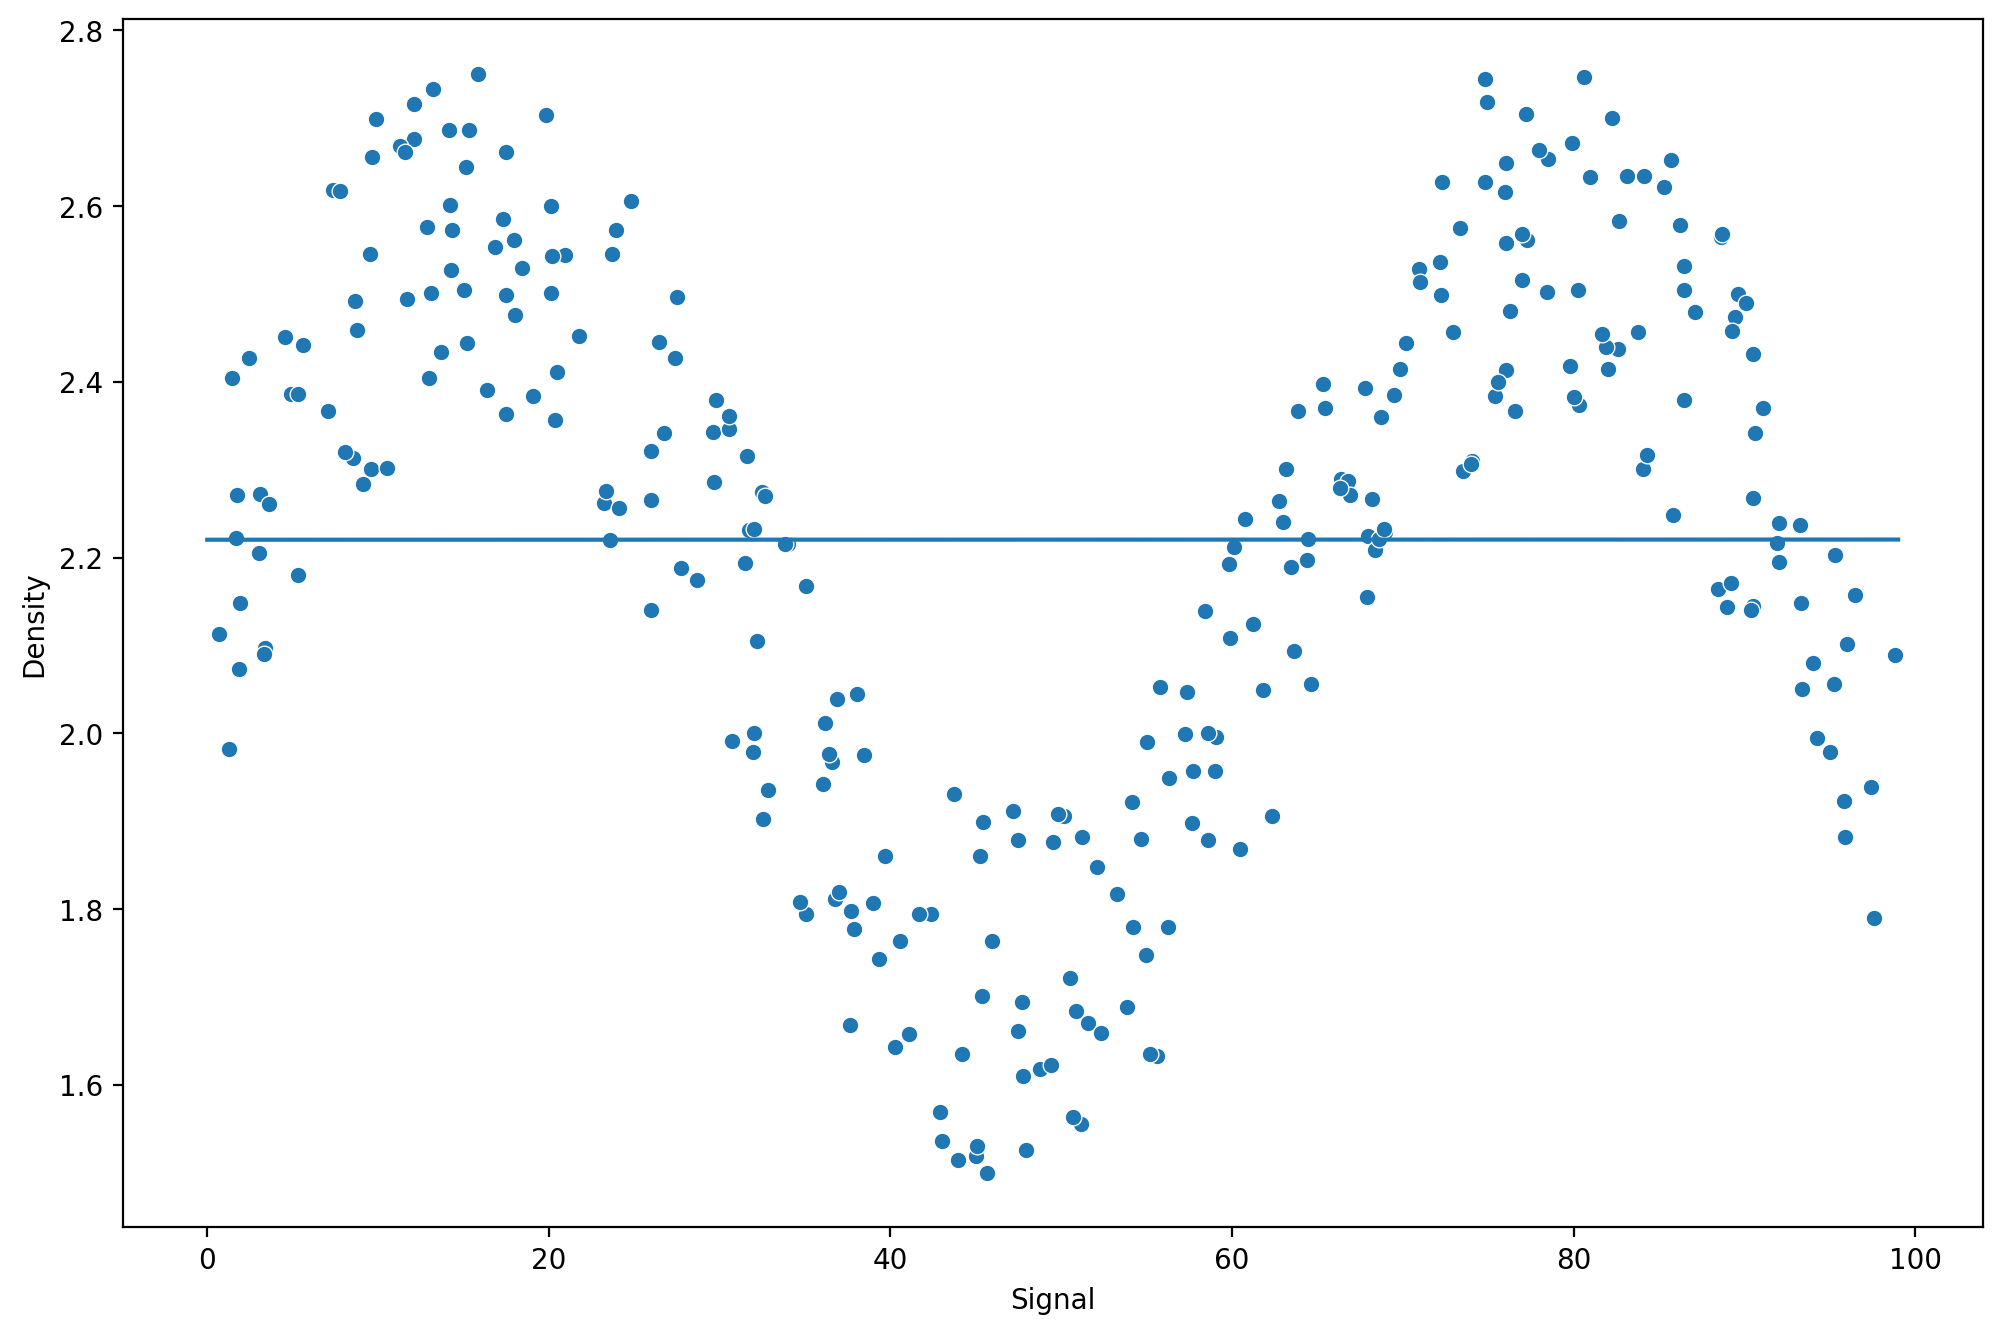

In [67]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x="Signal",y="Density",data=df)

plt.plot(signal_range,signal_pred)

In [68]:
## Polynomial Regression

def run_model(model,X_train,y_train,X_test,y_test):

    #FIT MODEL TRAINING
    model.fit(X_train,y_train)

    #GET METRICS
    pred=model.predict(X_test)
    mae=mean_absolute_error(y_test,pred)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print(f"MAE:{mae}")
    print(f"RMSE:{rmse}")

    #PLOT RESULTS MODEL SIGNAL RANGE
    signal_range=np.arange(0,100)
    signal_pred=model.predict(signal_range.reshape(-1,1))

    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x="Signal",y="Density",data=df,color="black")


    plt.plot(signal_range,signal_pred)

In [70]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [75]:
pipe=make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

MAE:0.11969195156646718
RMSE:0.13807554969619368


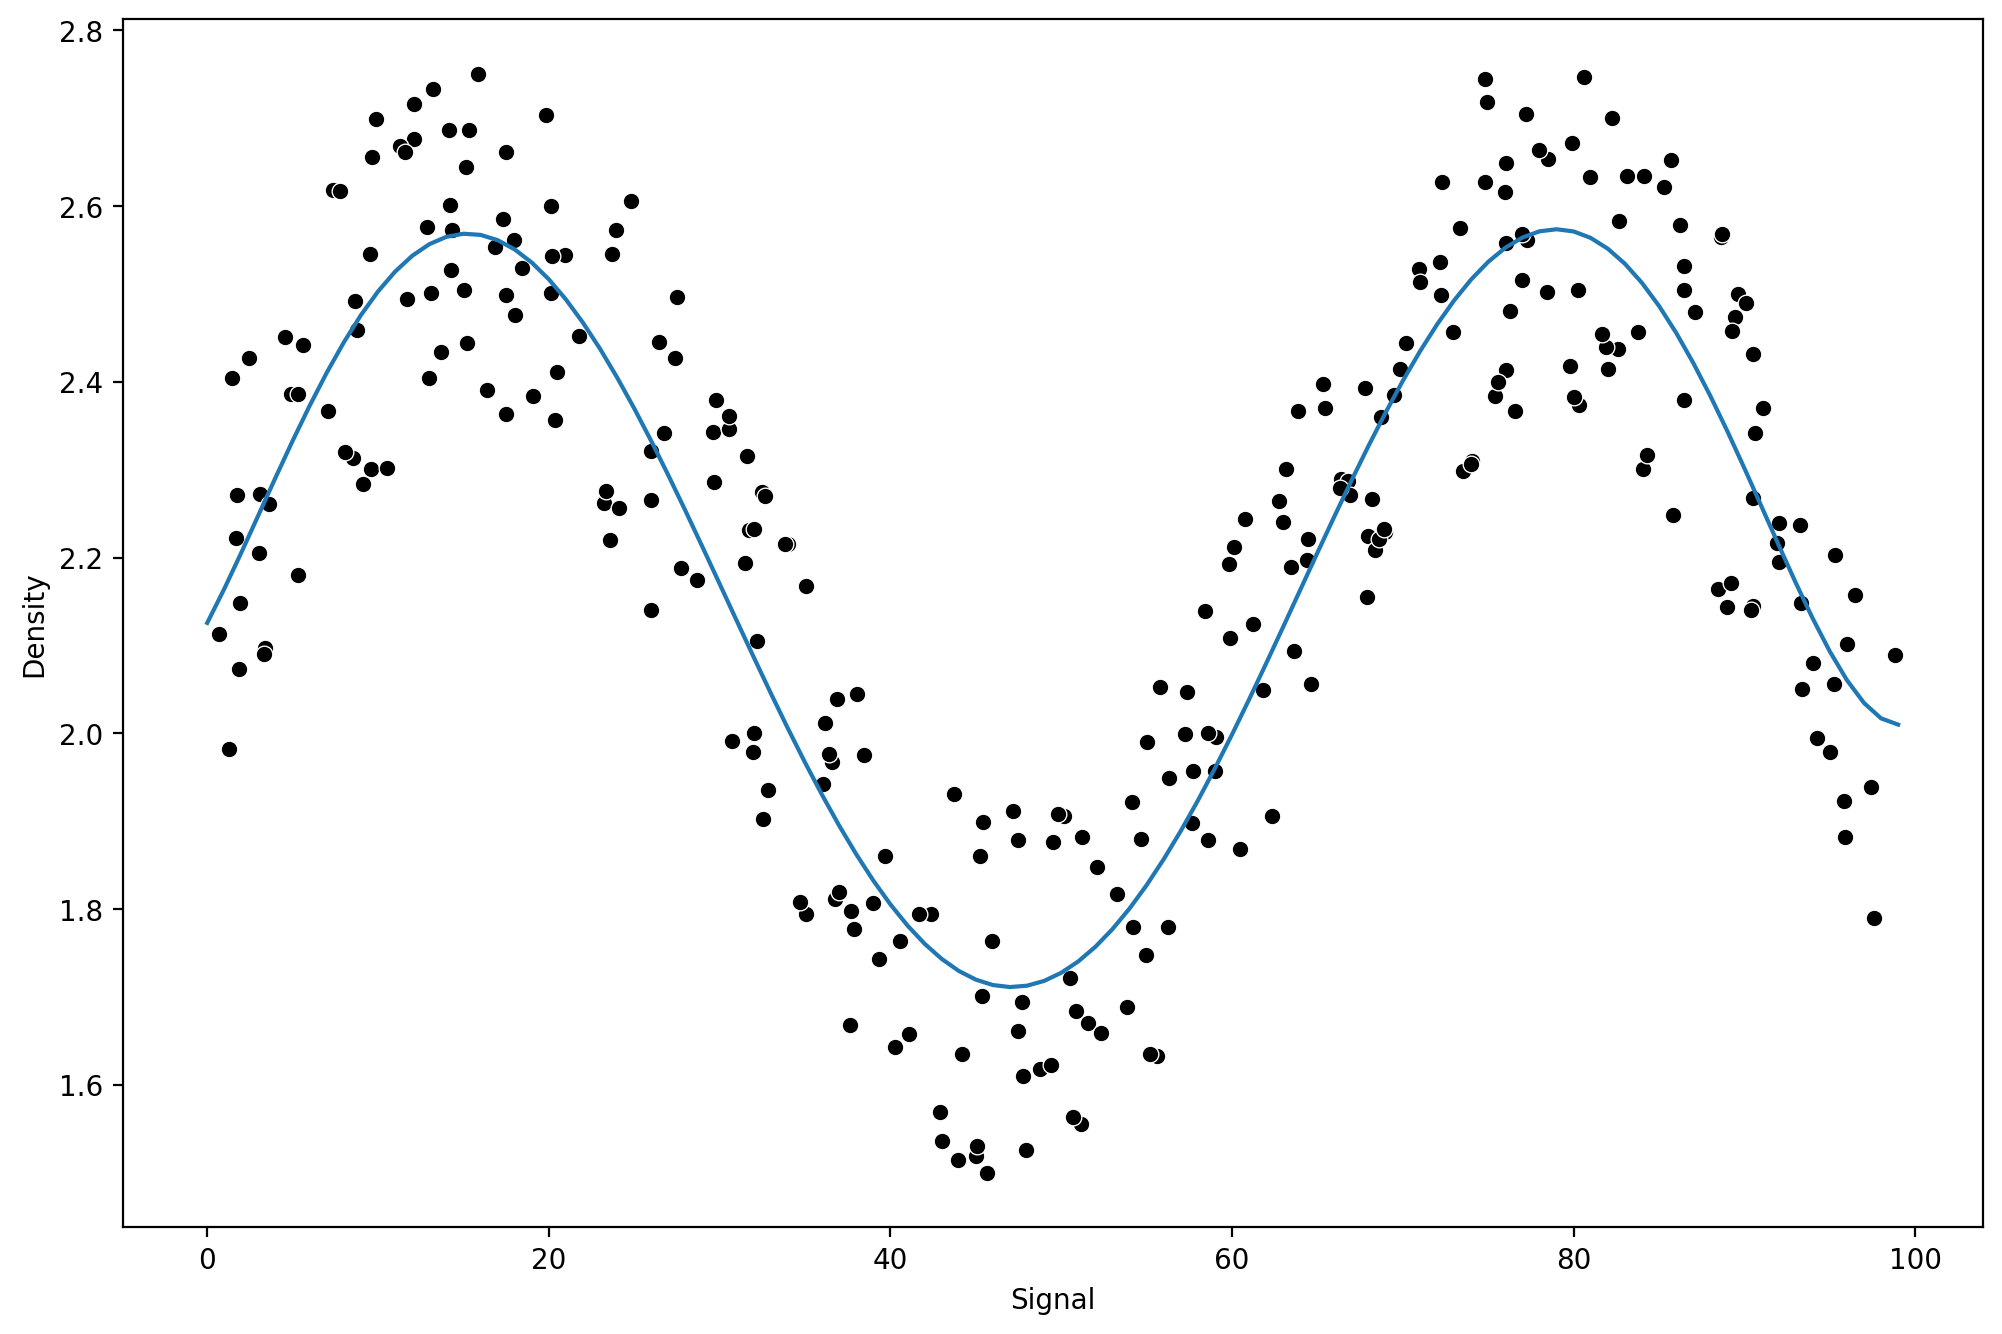

In [76]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [77]:
from sklearn.neighbors import KNeighborsRegressor

MAE:0.11877297474442378
RMSE:0.1523487028635337
MAE:0.12198383614100558
RMSE:0.13730685016923647
MAE:0.11635971693292672
RMSE:0.13277855732740926


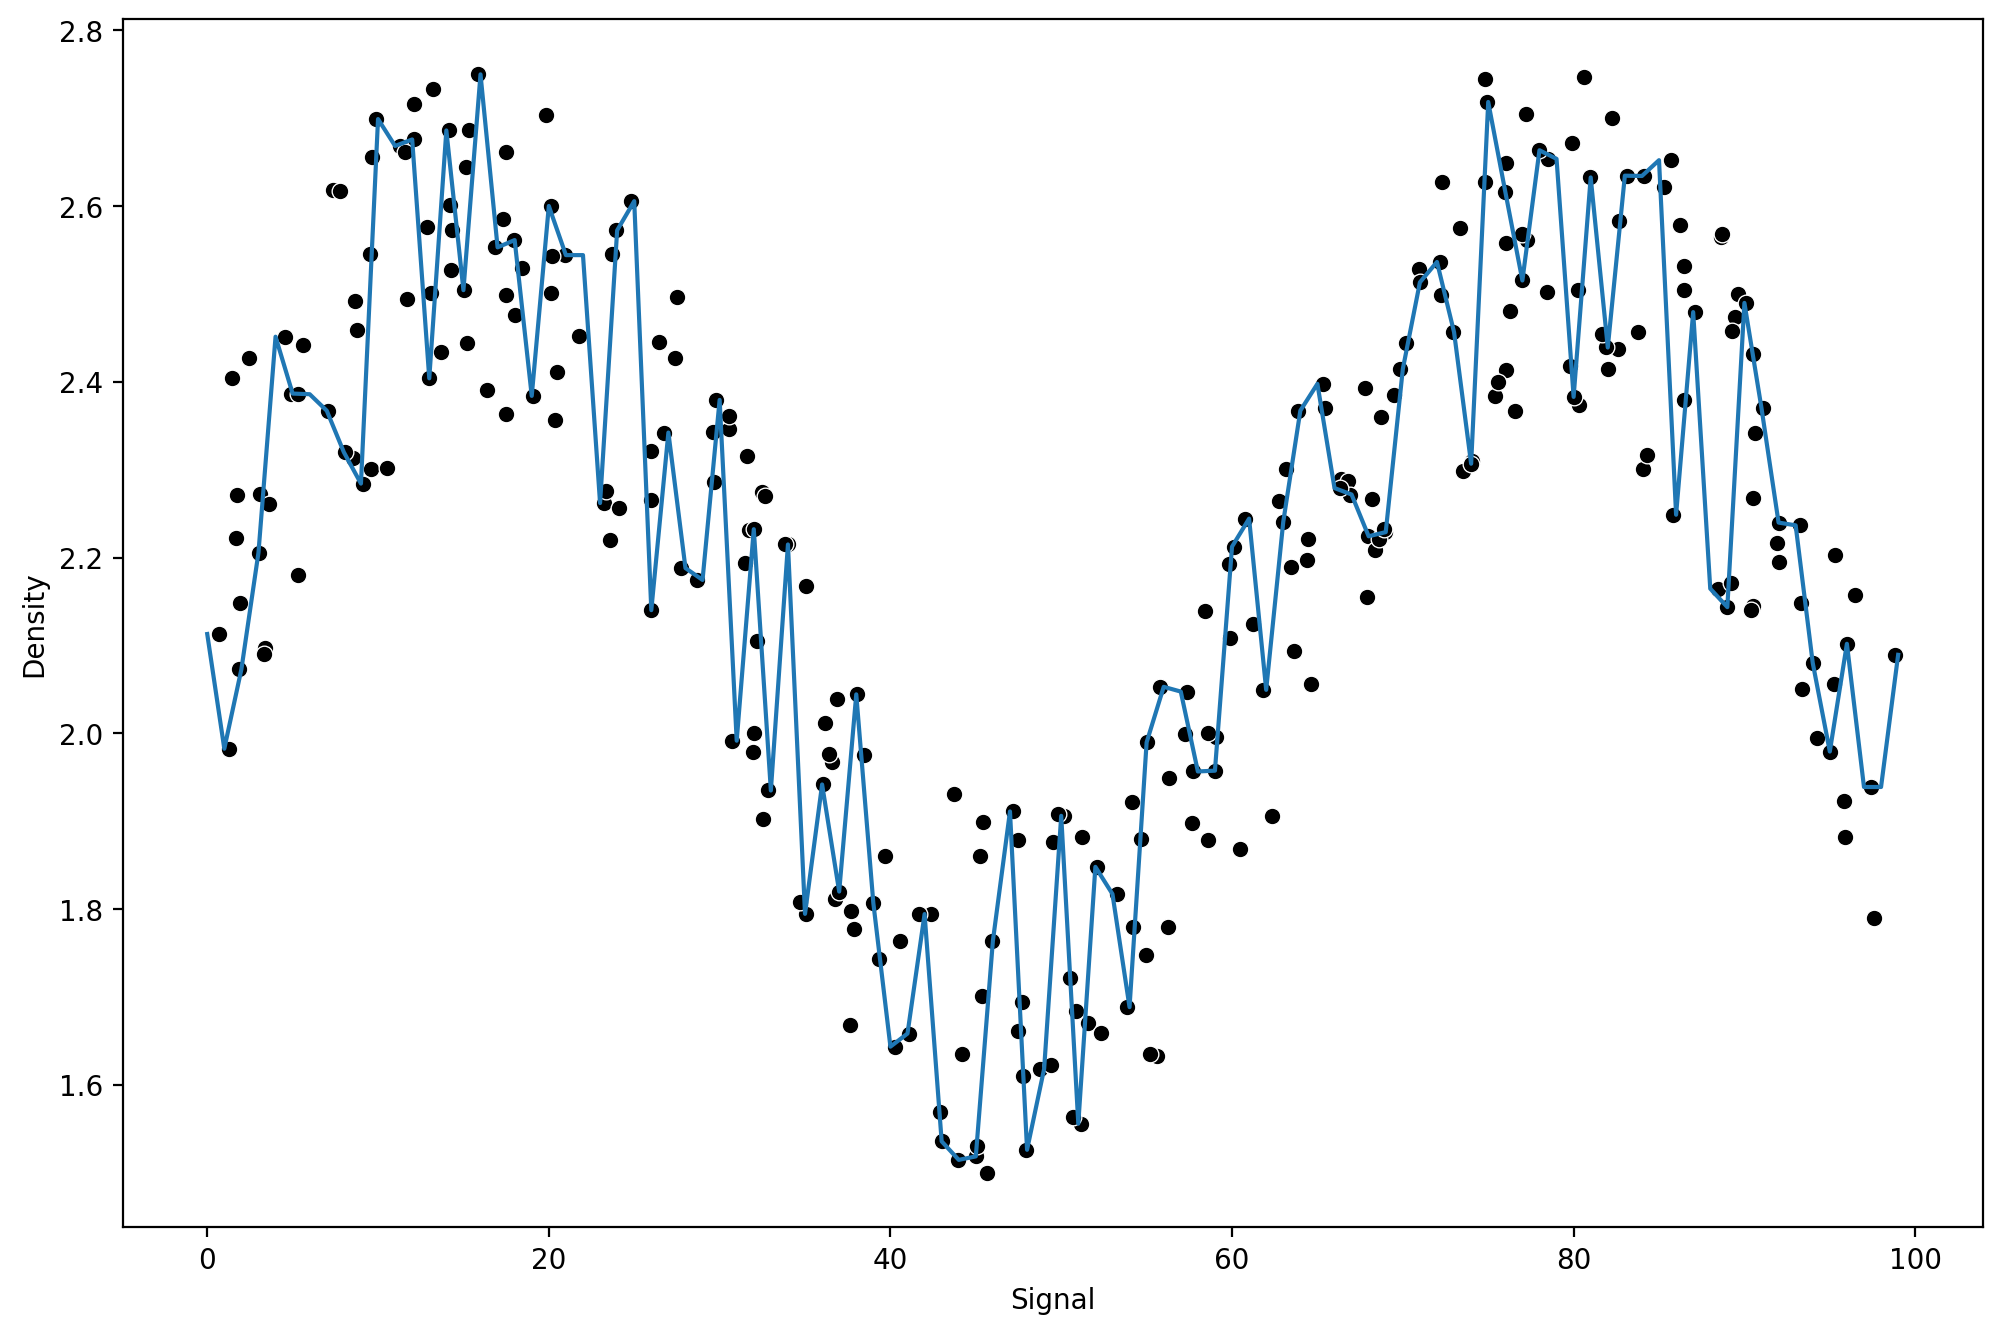

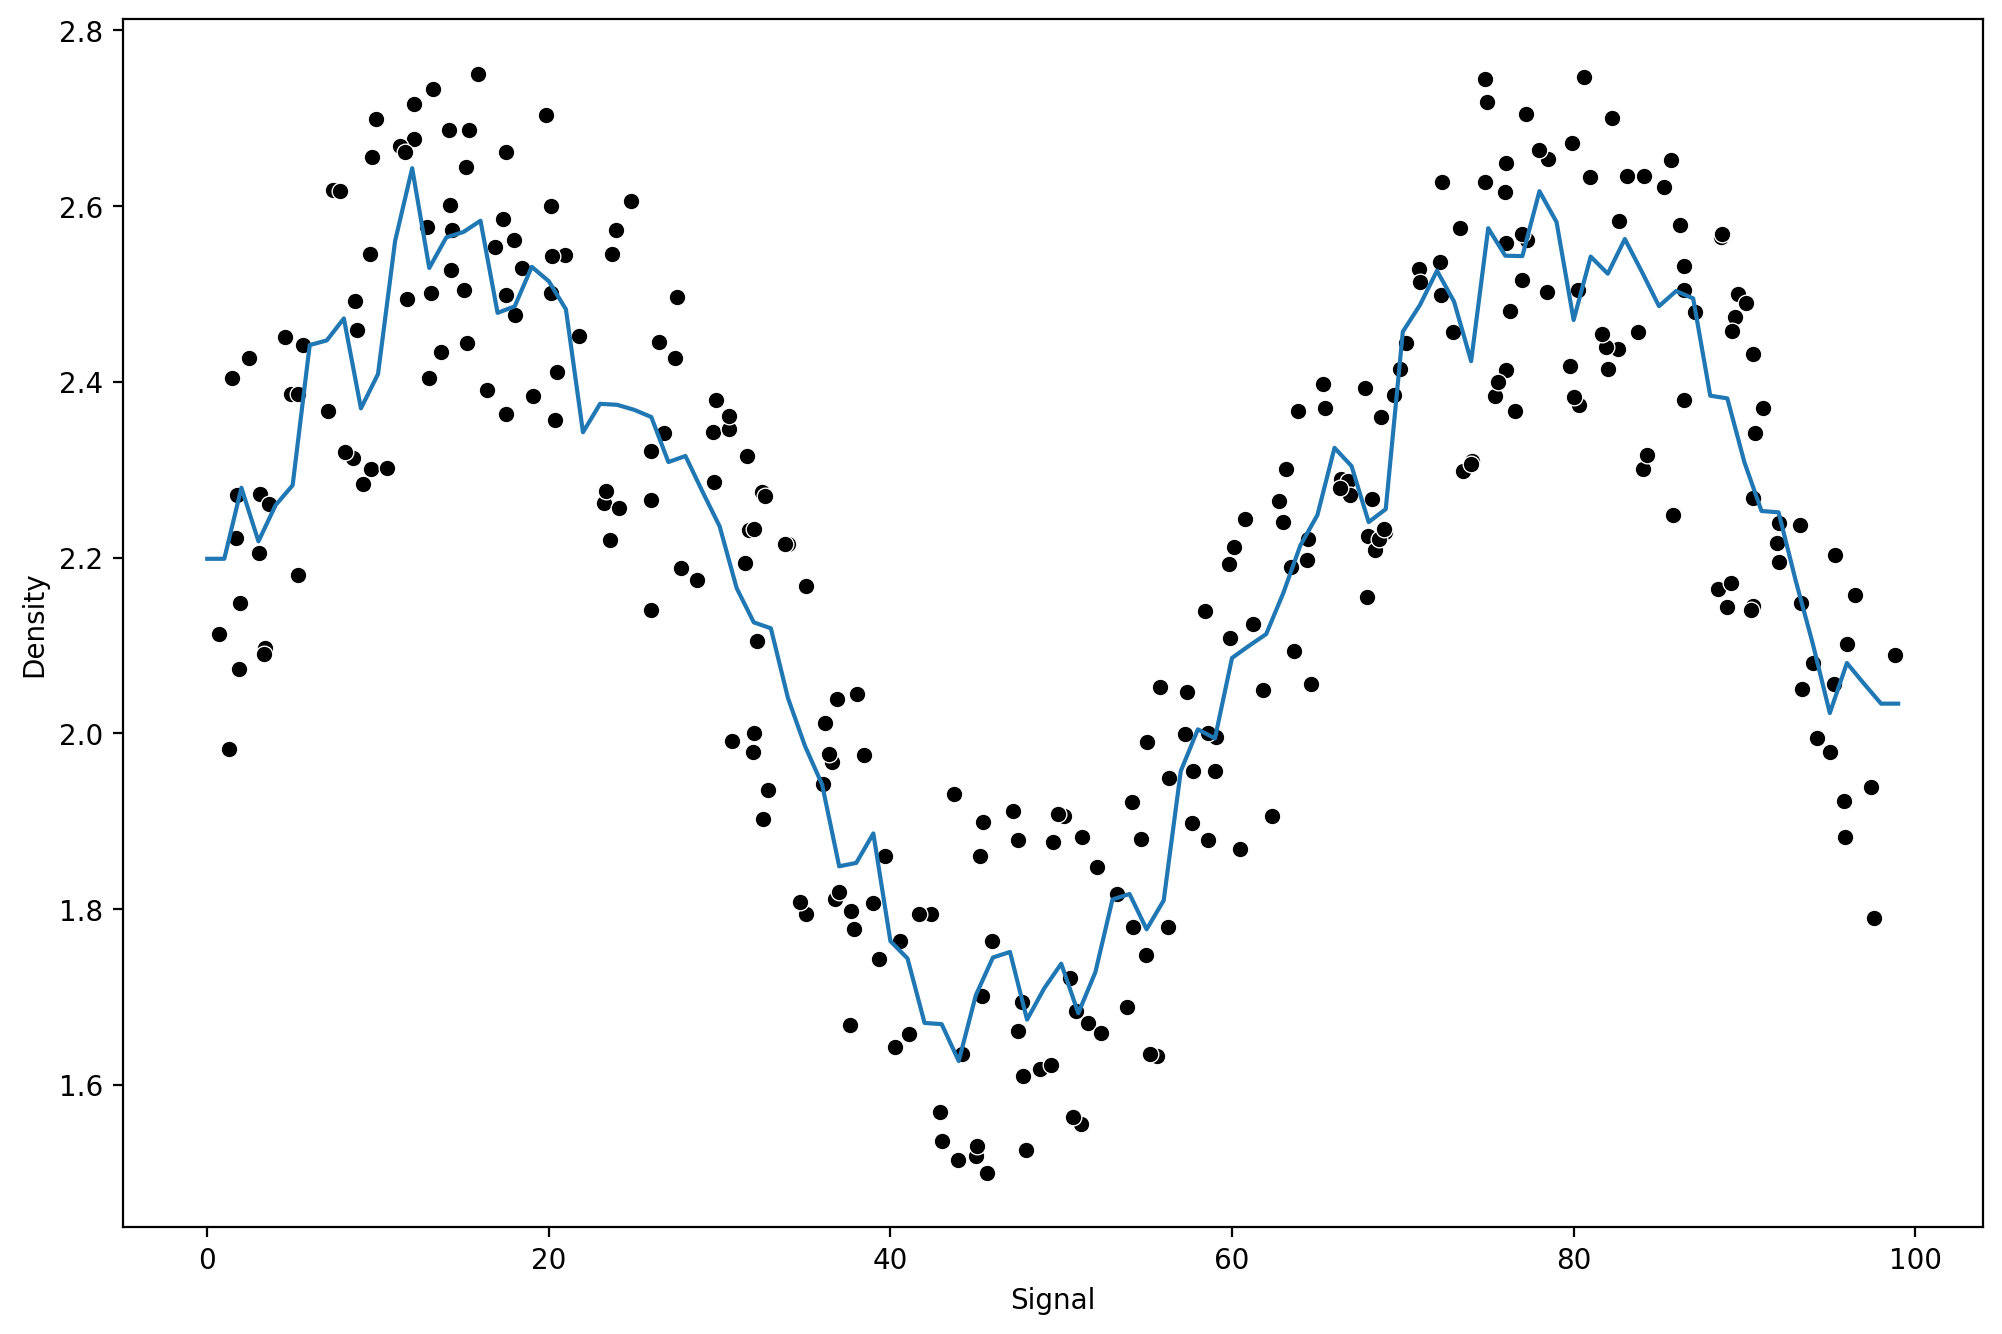

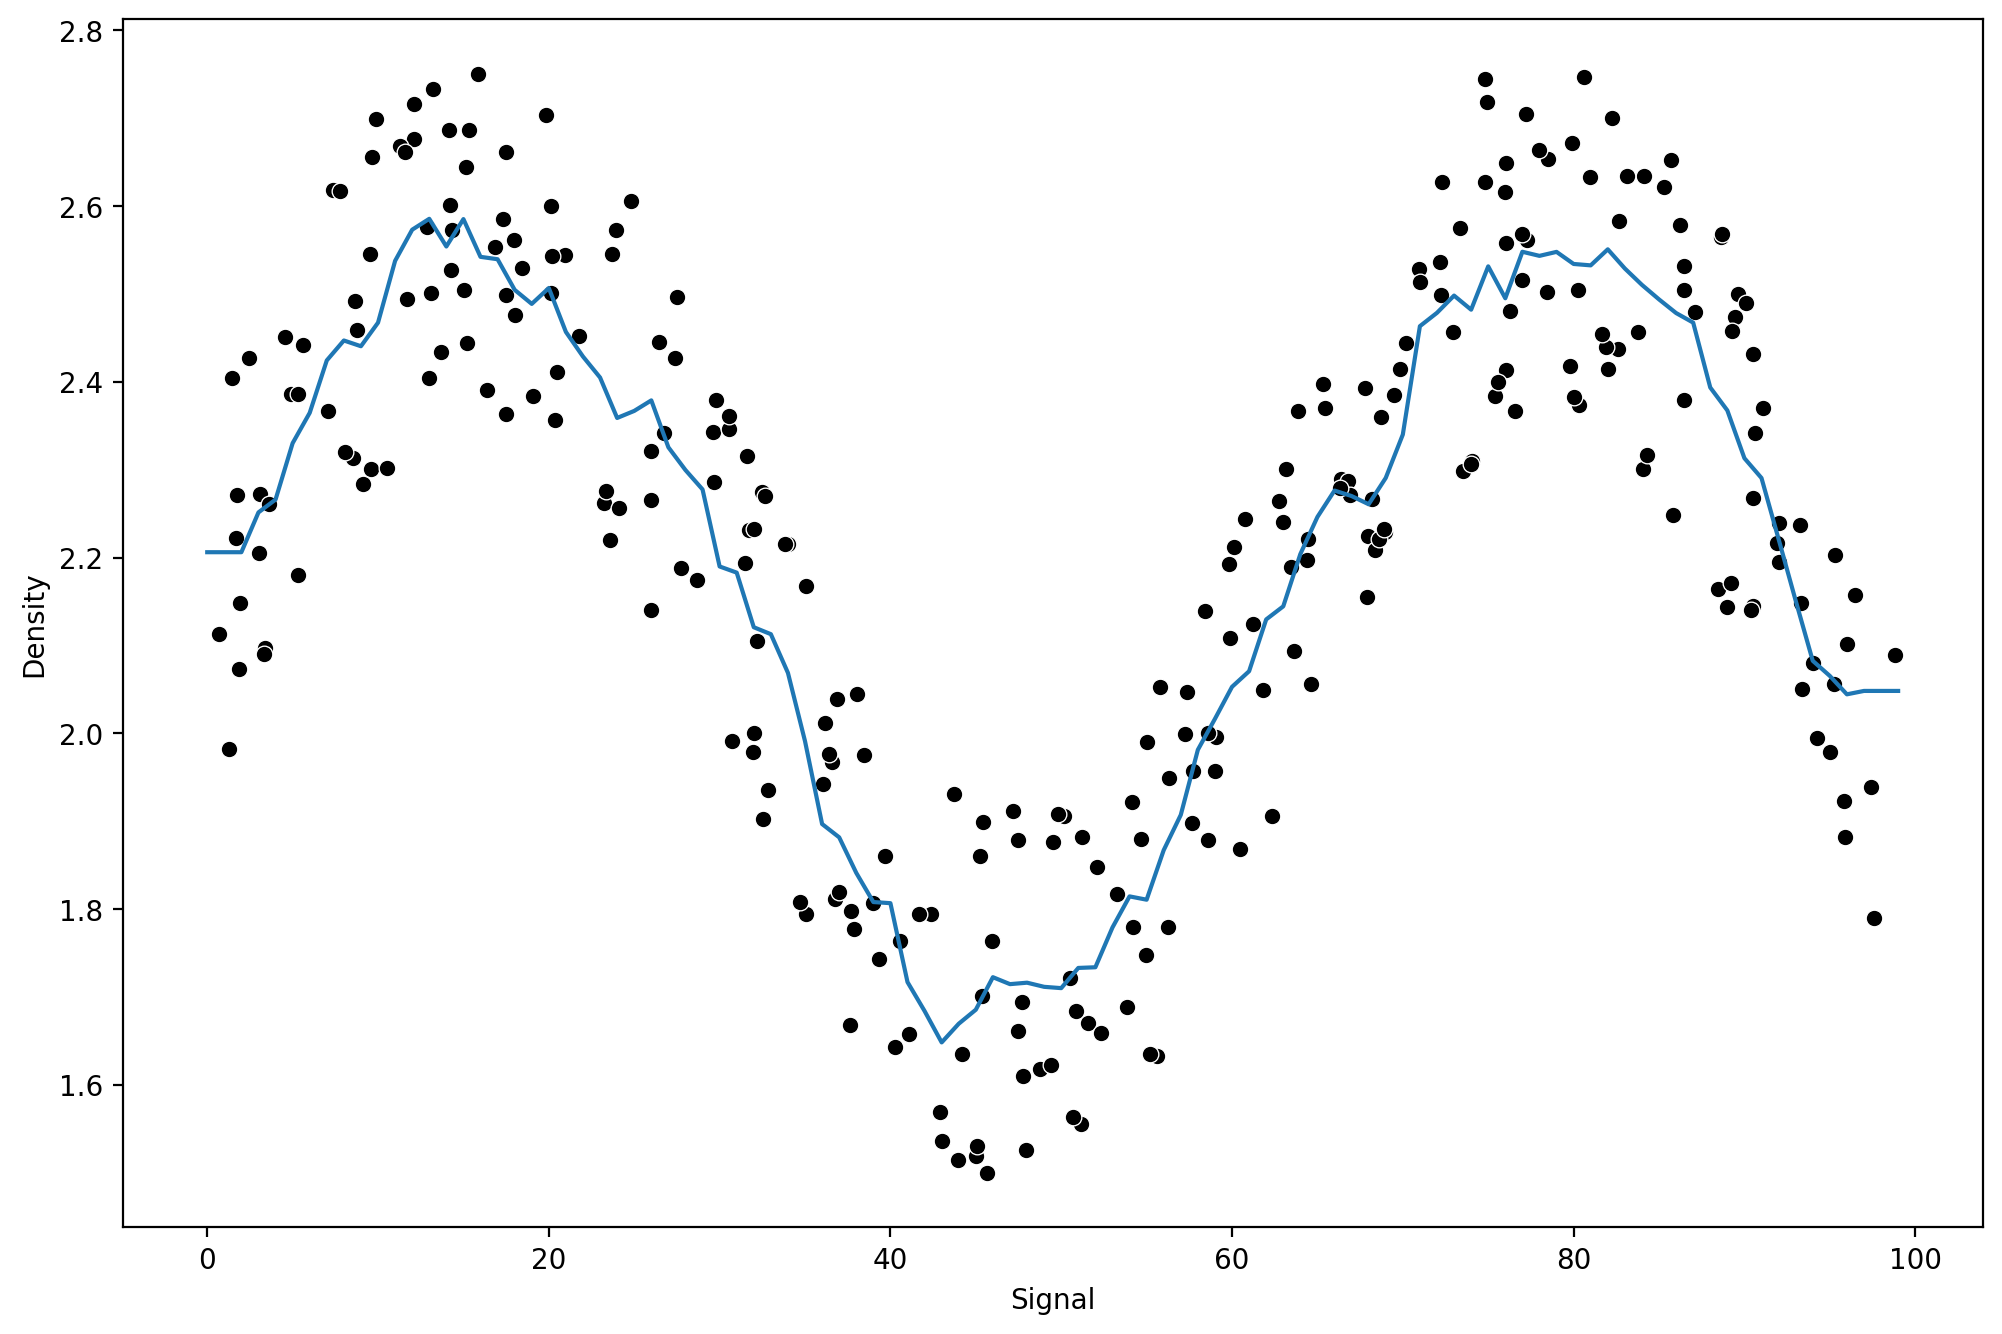

In [78]:
k_values=[1,5,10]

for n in k_values:
    model=KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [79]:
from sklearn.tree import DecisionTreeRegressor

MAE:0.11877297474442378
RMSE:0.1523487028635337


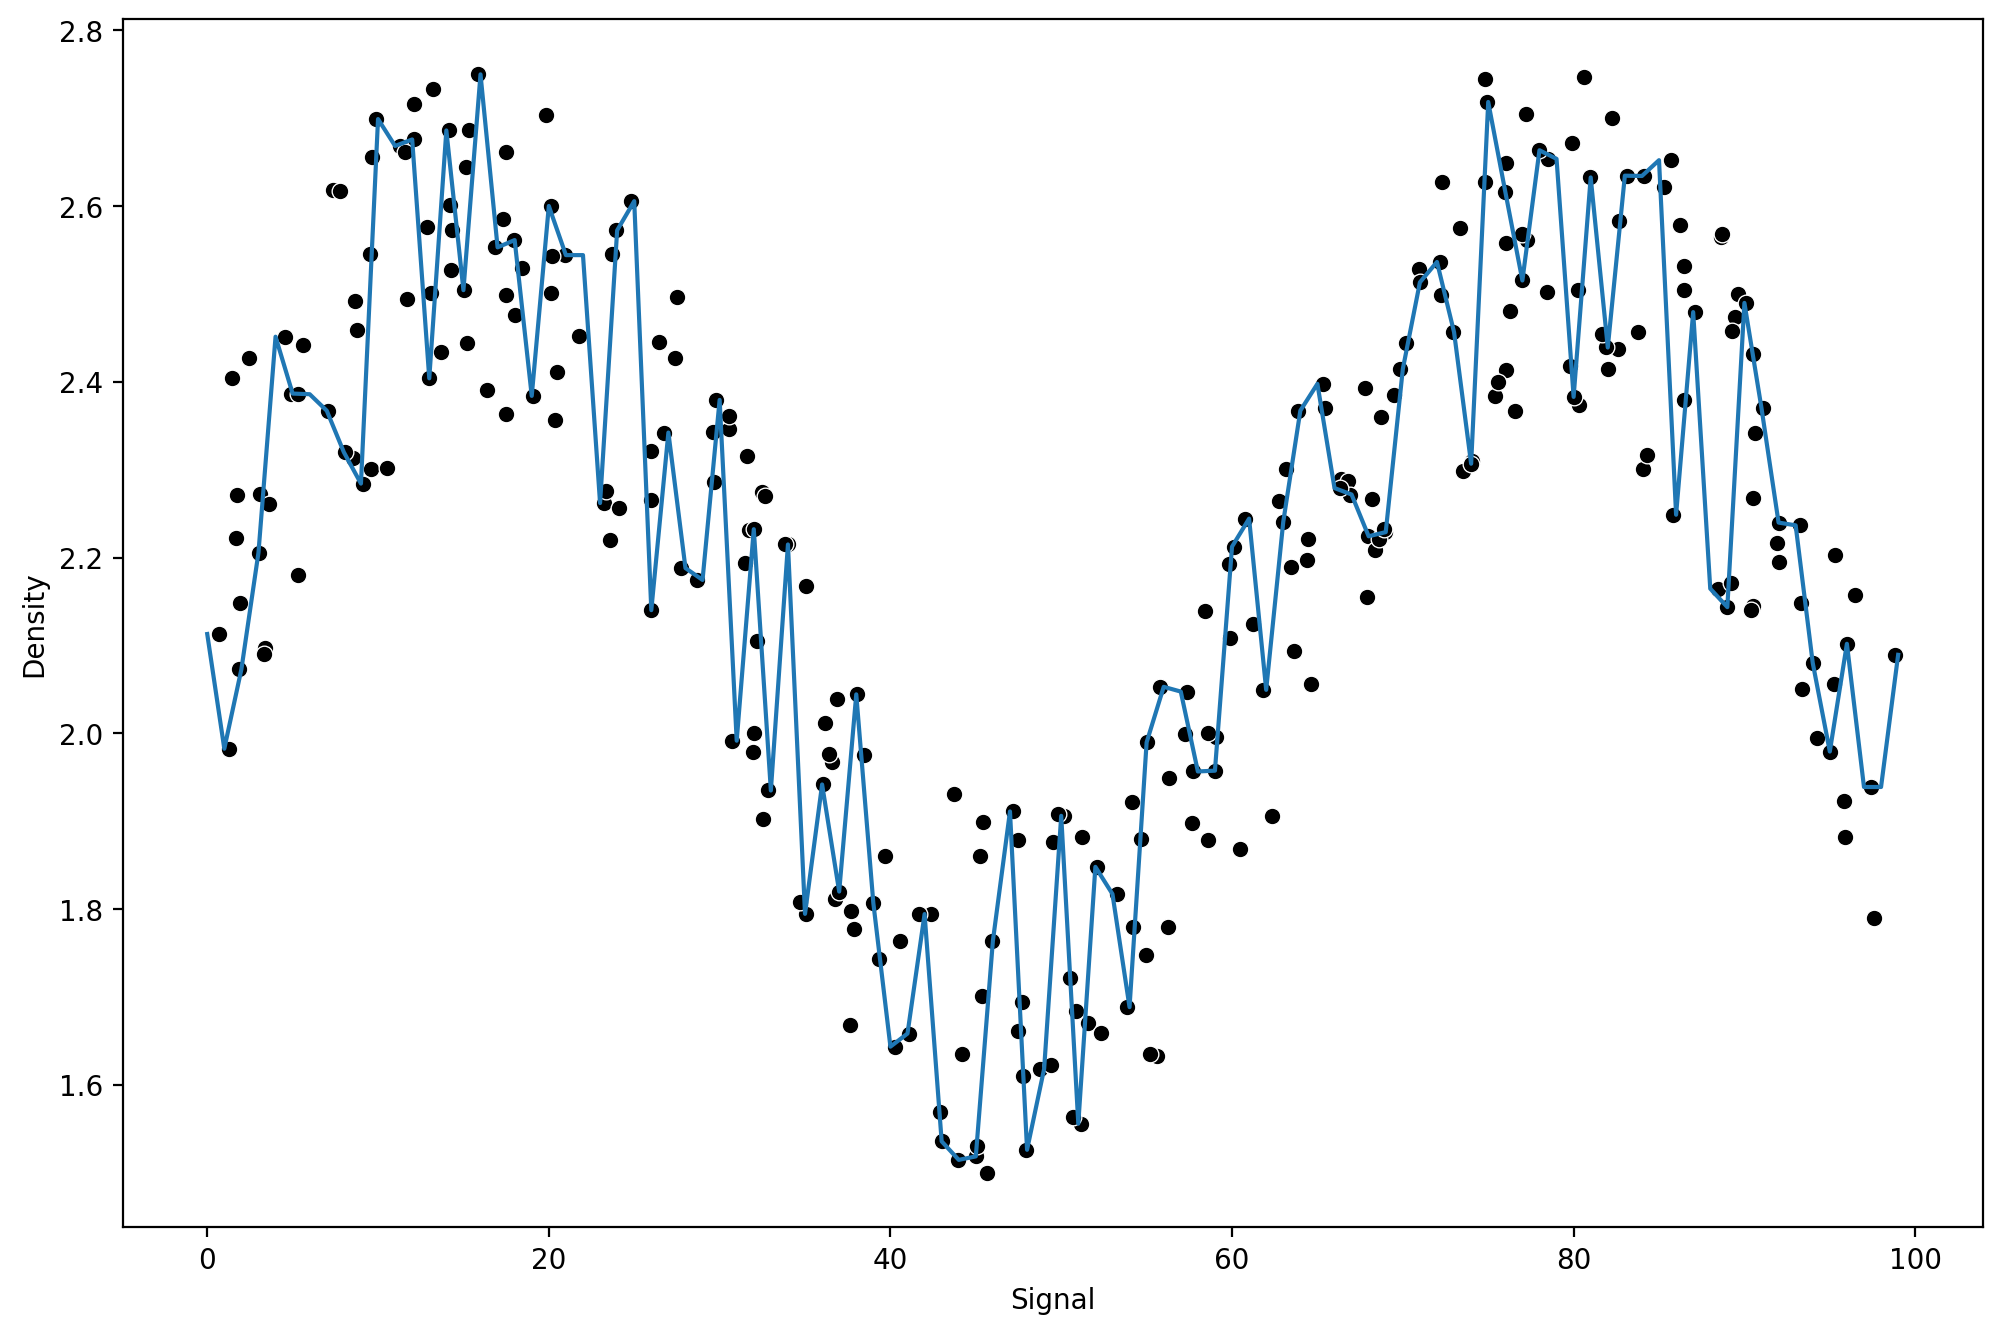

In [80]:
model=DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [81]:
from sklearn.svm import SVR

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
svr=SVR()
param_grid={"C":[0.01,0.1,1,5,10,100,1000],
            "gamma":["auto","scale"]}
grid=GridSearchCV(svr,param_grid)

MAE:0.10854210121348368
RMSE:0.12646999302046696


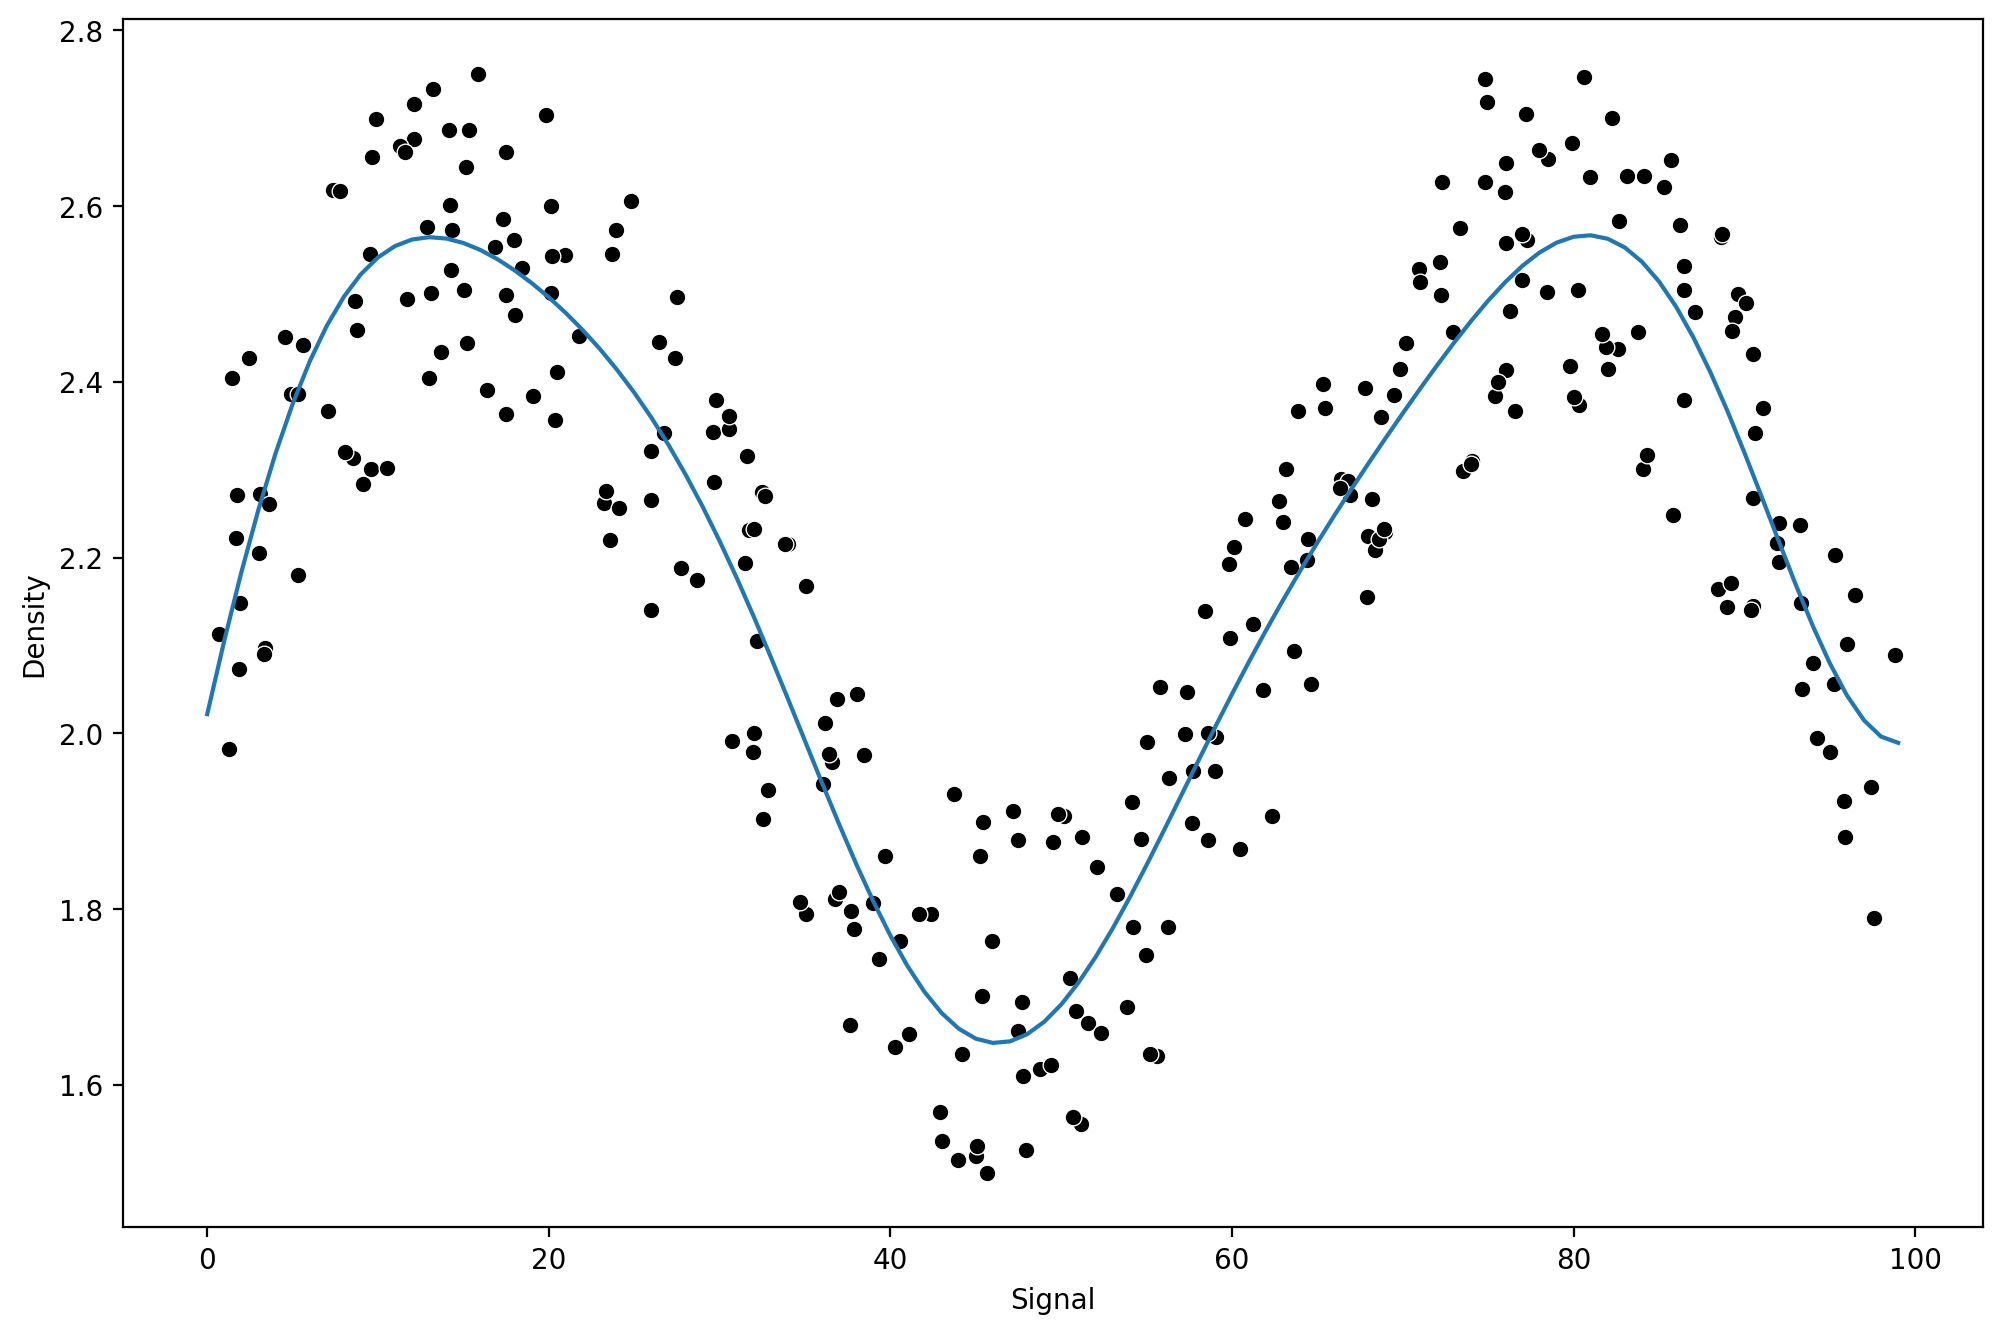

In [84]:
run_model(grid,X_train,y_train,X_test,y_test)

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rfr=RandomForestRegressor(n_estimators=10)

MAE:0.10942065754615665
RMSE:0.12760791795893658


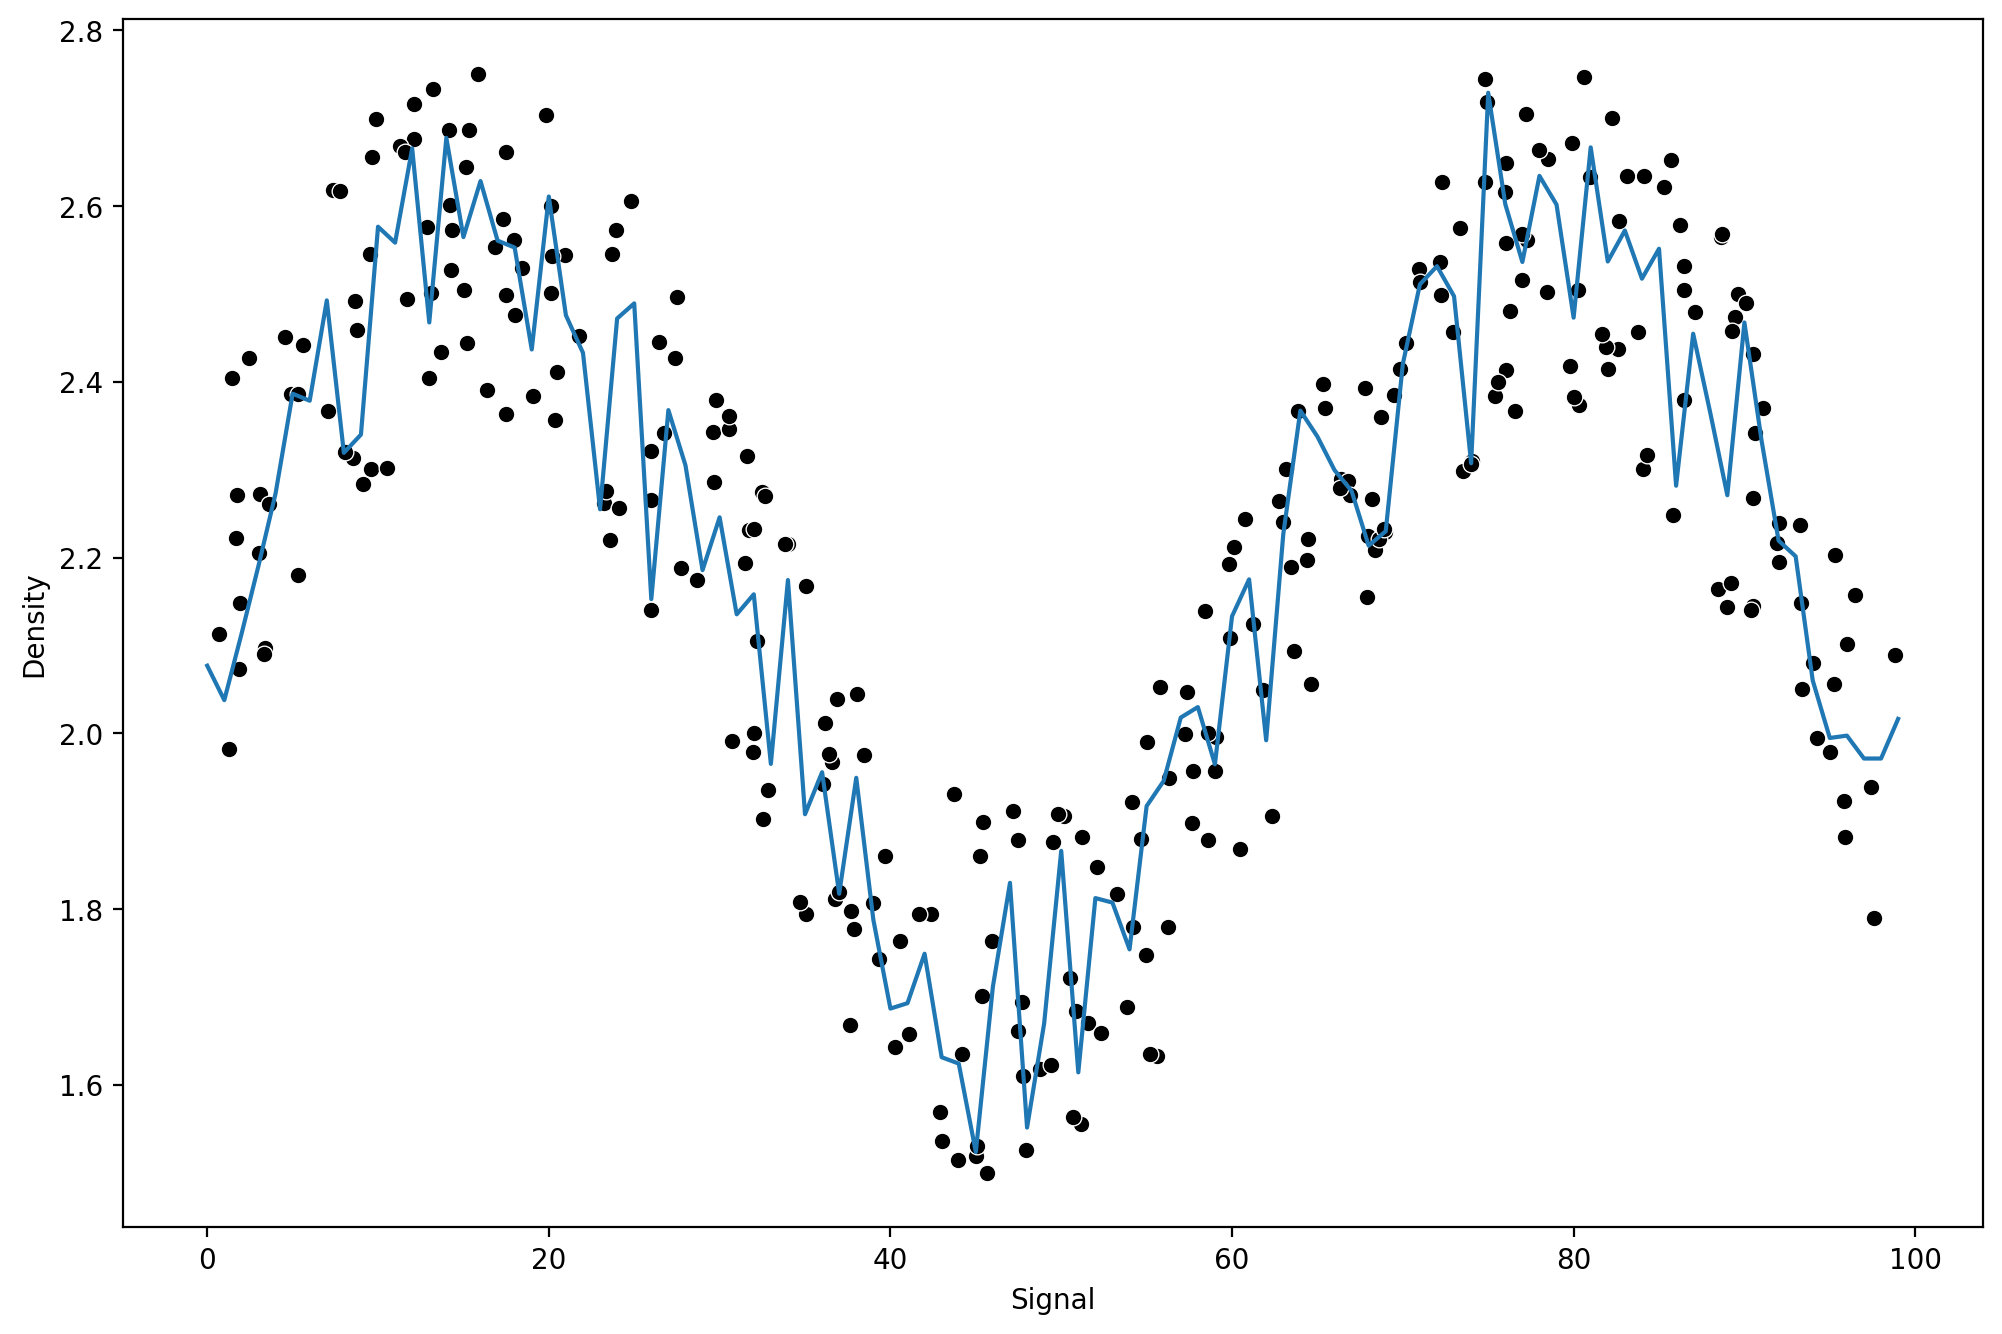

In [88]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [89]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

MAE:0.11318284854800689
RMSE:0.13294148649584667


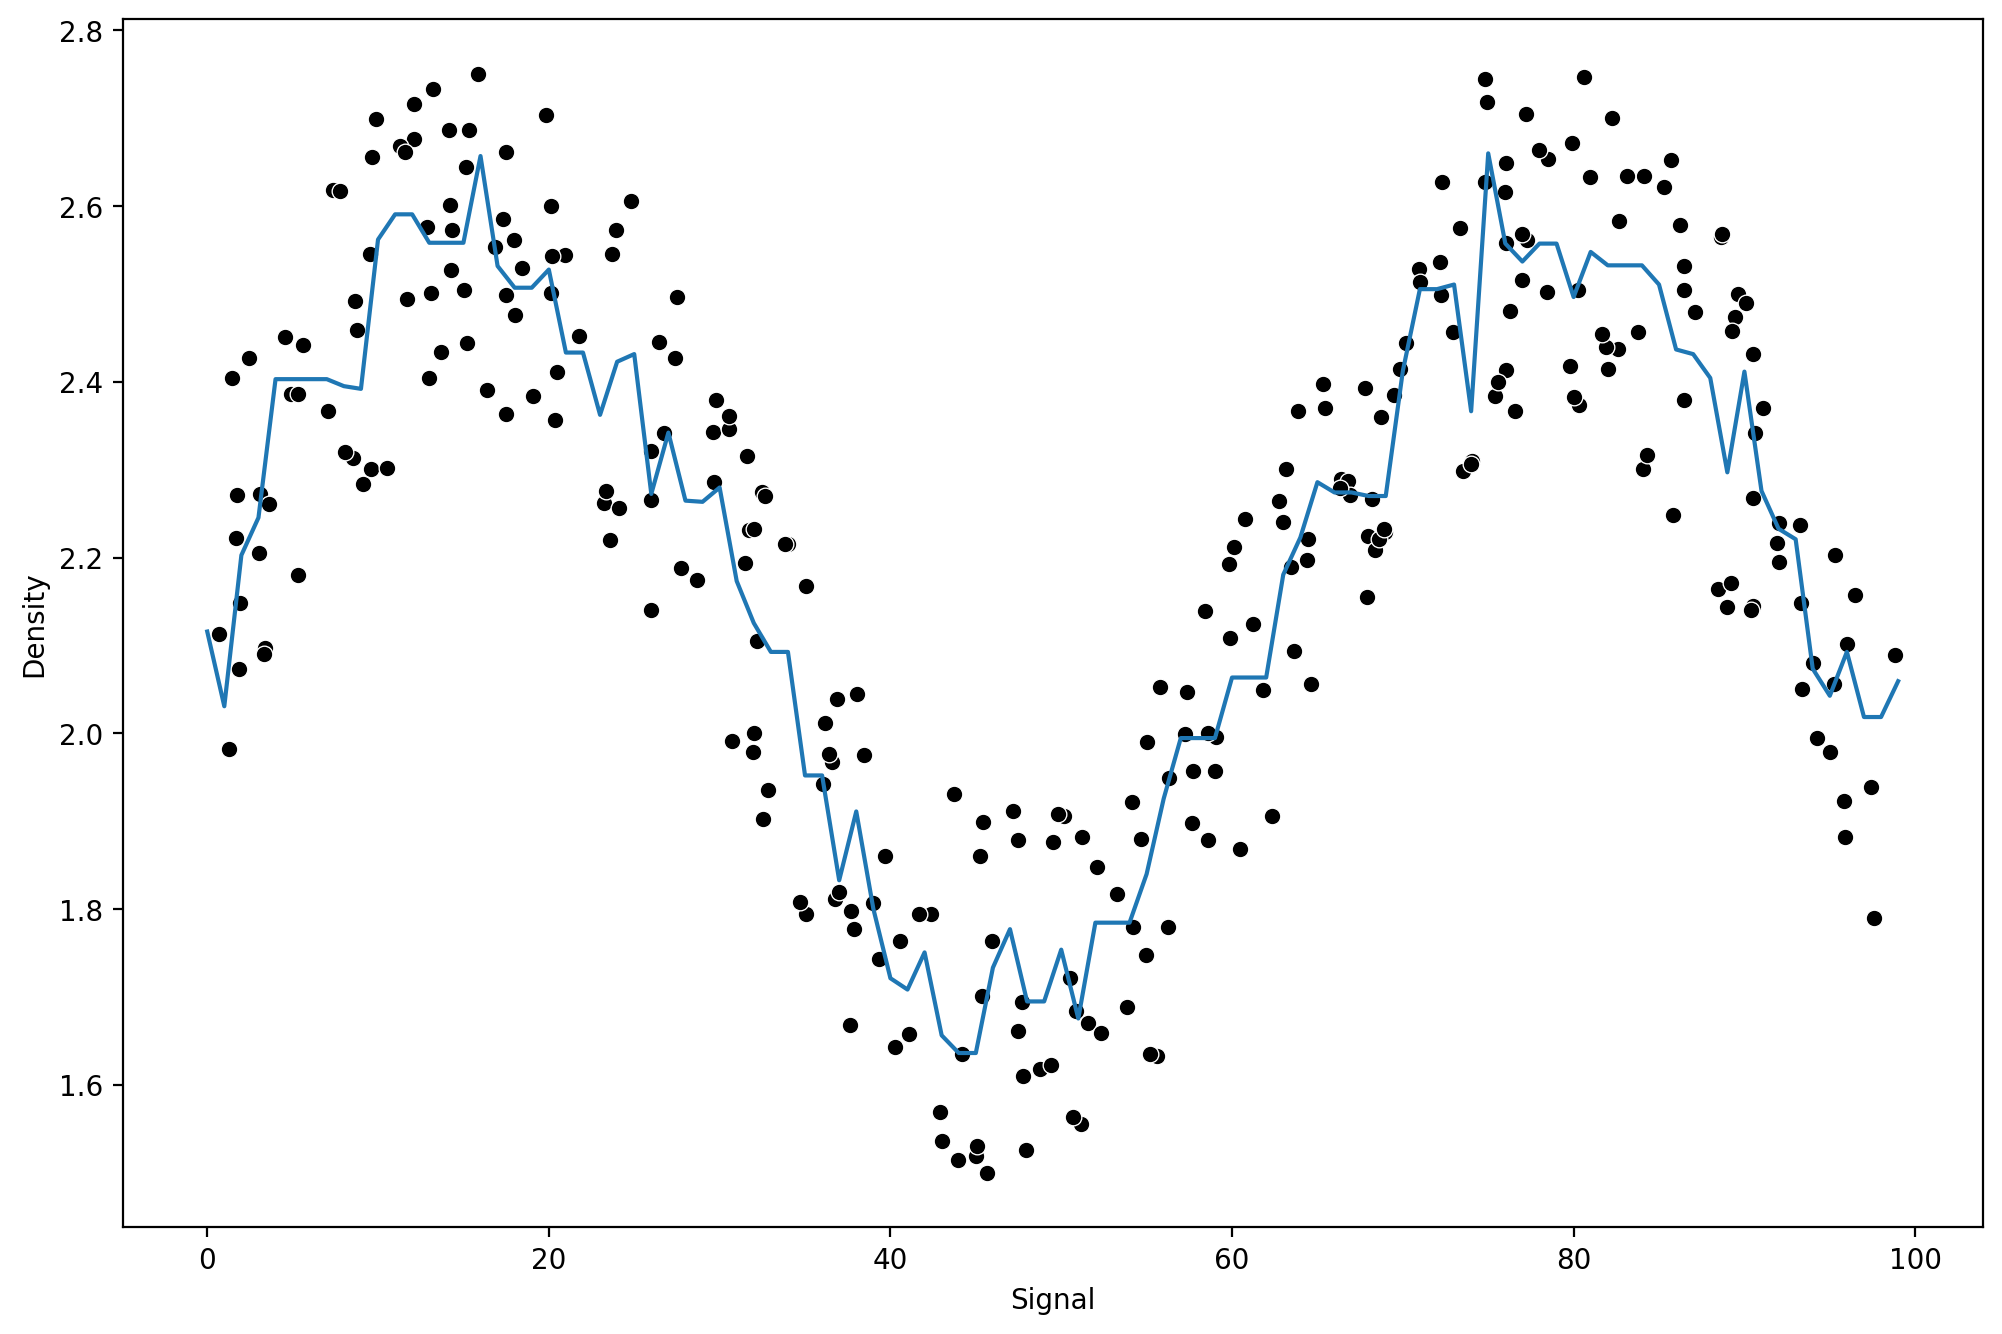

In [90]:
model=GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

MAE:0.11367235977547024
RMSE:0.1322503822995553


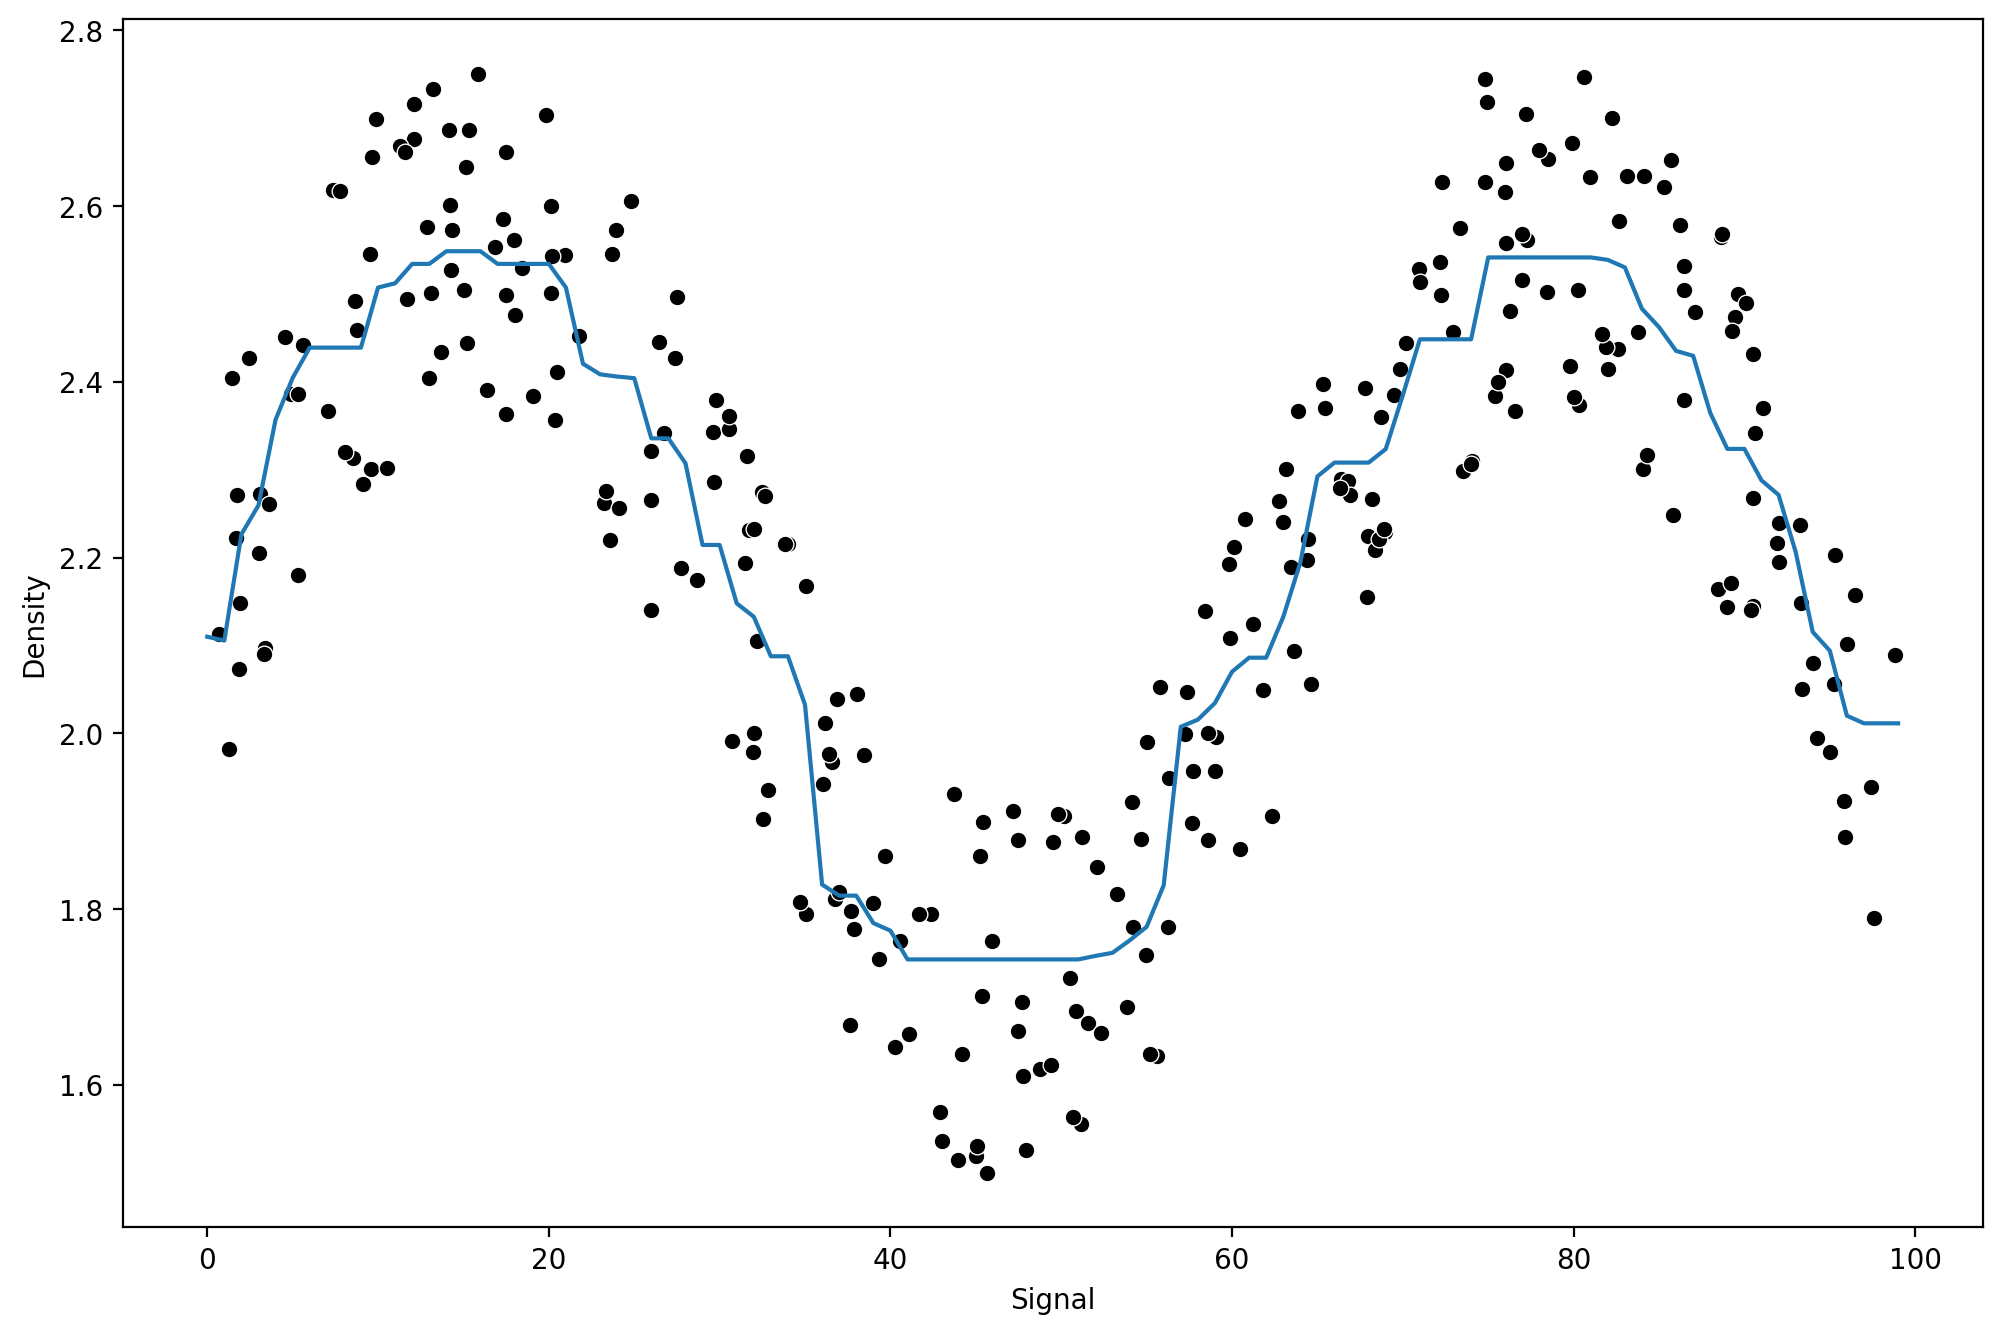

In [91]:
model=AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)